# Heat equation

## libs

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib import animation
from IPython.display import HTML
from scipy import special

## initialization

In [120]:
check=0.5

LAMBDA = 0.5
LENGTH = 10
DURATION = 50
INITIAL = 0
BOUND = 25

NUMBER_X = 50
NUMBER_T = int(LAMBDA * DURATION * NUMBER_X**2 / LENGTH**2 / check)

In [121]:
step_x = LENGTH / (NUMBER_X - 1)
step_t = DURATION / (NUMBER_T - 1)

In [122]:
axis = np.linspace(0, LENGTH, NUMBER_X)
time = np.linspace(0, DURATION, NUMBER_T)

temperature = pd.DataFrame(columns = np.concatenate([['x'], time]))

In [123]:
temperature['x'] = axis
temperature = temperature.set_index('x')

In [124]:
exact_solution = temperature.copy()

In [125]:
temperature.iloc[:, 0] = INITIAL
temperature.iloc[0] = BOUND
temperature.iloc[NUMBER_X-1, :] = INITIAL

## main procedure

In [126]:
pbar = tqdm_notebook(total = NUMBER_T - 1)

for t in range(0, NUMBER_T - 1):
    for x in range(1, NUMBER_X - 1):
        second_derivative = LAMBDA / step_x**2 * (temperature.iloc[x+1, t] - 2 * temperature.iloc[x, t] + 
                                         temperature.iloc[x-1, t])
        temperature.iloc[x, t+1] = step_t * second_derivative + temperature.iloc[x, t]
        
        exact_solution.iloc[x, t+1] = BOUND * (1 - special.erf(x * step_x / (2 * np.sqrt(LAMBDA * (t+1) * step_t))))
    pbar.update()
    

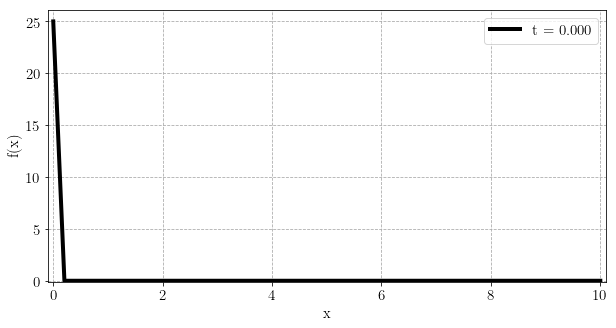

In [127]:
plt.rcParams.update({'font.size': 15})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('text.latex', preamble=r'\usepackage[english]{babel}')

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis([-0.1, LENGTH + 0.1, -0.1, BOUND + 1.1])

l1, = ax.plot(temperature.index, temperature.iloc[:, NUMBER_T - 1], lw=4, color='black', label=NUMBER_T)
l2, = ax.plot(exact_solution.index, exact_solution.iloc[:, NUMBER_T - 1], lw=2, color='red', label=None)

ax.grid(c='#aaaaaa', ls='--')

ax.set_ylabel("f(x)")
ax.set_xlabel("x")

def animate(i):
    l1.set_data(temperature.index, temperature.iloc[:, i])
    l1.set_label('t = ' + '%.3f' % (i * step_t))
    l2.set_data(exact_solution.index, exact_solution.iloc[:, i])
    l2.set_label(None)
    
    legend = plt.legend(loc='upper right')
    return l1, l2, legend

ani = animation.FuncAnimation(fig, animate, frames= np.arange(0, NUMBER_T - 1, 15), interval=50)

#ani.save("solution.mp4")
HTML(ani.to_jshtml())